In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
dat = pd.date_range(start="2020-01-30",end="2020-05-20")

In [4]:
dat

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', length=112, freq='D')

In [5]:
cols_to_use = ['Date', 'Total Recovered'] # or [0,1,2,3]
dataC = pd.read_csv('case_time_series.csv', usecols= cols_to_use)

In [6]:
dataC.head()

,Date,Total Recovered
0,30 January,0
1,31 January,0
2,01 February,0
3,02 February,0
4,03 February,0


In [7]:
dataC["Dates"] = dat

In [8]:
dataC["Total"] = dataC["Total Recovered"]

In [9]:
dataC = dataC.drop(["Date","Total Recovered"],axis = 1)

In [10]:
dataC.index.freq = 'MS'
dataC.head()

,Dates,Total
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [11]:
dataC.tail(4)

,Dates,Total
108,2020-05-17,36795
109,2020-05-18,39277
110,2020-05-19,42309
111,2020-05-20,45422


In [12]:
dataC.to_csv('recovered.csv', index=False) 

In [13]:
df = pd.read_csv('recovered.csv',index_col='Dates',parse_dates=True)

In [14]:
df.index.freq = 'D'
df.head()

,Total
Dates,
2020-01-30,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0


In [15]:
df = df.loc[~(df==0).all(axis=1)]

In [16]:
df

,Total
Dates,
2020-02-13,1
2020-02-14,1
2020-02-15,1
2020-02-16,2
2020-02-17,2
2020-02-18,2
2020-02-19,2
2020-02-20,3
2020-02-21,3


In [17]:
train_data = df.iloc[:99] 
test_data = df.iloc[68:]

In [18]:
train_data.shape

(98, 1)

In [19]:
test_data.shape

(30, 1)

In [20]:
train_data.head(5)

,Total
Dates,
2020-02-13,1
2020-02-14,1
2020-02-15,1
2020-02-16,2
2020-02-17,2


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
fitted_model = ExponentialSmoothing(train_data['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
test_predictions = fitted_model.forecast(30).rename('Recovered Cases Prediction')

In [24]:
test_predictions

2020-05-21     49206.762945
2020-05-22     52949.404618
2020-05-23     56543.470606
2020-05-24     61012.378080
2020-05-25     65278.924681
2020-05-26     69547.143771
2020-05-27     75068.017119
2020-05-28     82715.963731
2020-05-29     89435.036692
2020-05-30     96040.062387
2020-05-31    104083.823533
2020-06-01    112776.212184
2020-06-02    120747.087134
2020-06-03    129931.049930
2020-06-04    138750.427045
2020-06-05    149716.552997
2020-06-06    160186.111314
2020-06-07    170659.773704
2020-06-08    184207.289029
2020-06-09    202974.369421
2020-06-10    219462.112968
2020-06-11    235669.999149
2020-06-12    255408.357657
2020-06-13    276738.364895
2020-06-14    296297.870023
2020-06-15    318834.137187
2020-06-16    340475.757833
2020-06-17    367385.224879
2020-06-18    393076.178615
2020-06-19    418777.203221
Freq: D, Name: Recovered Cases Prediction, dtype: float64

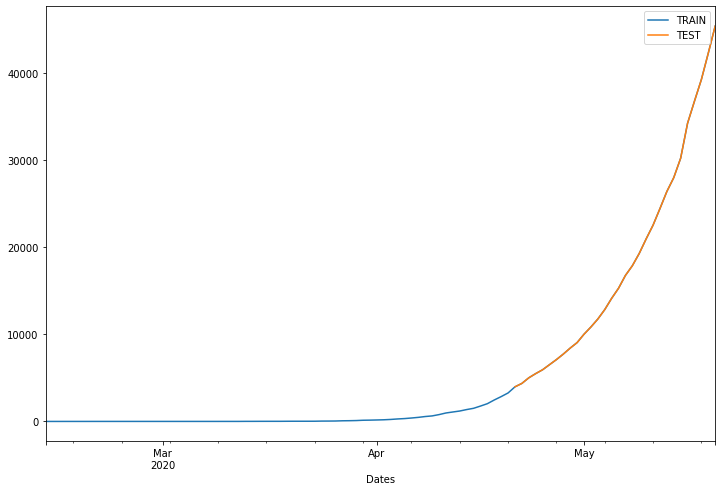

In [25]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))

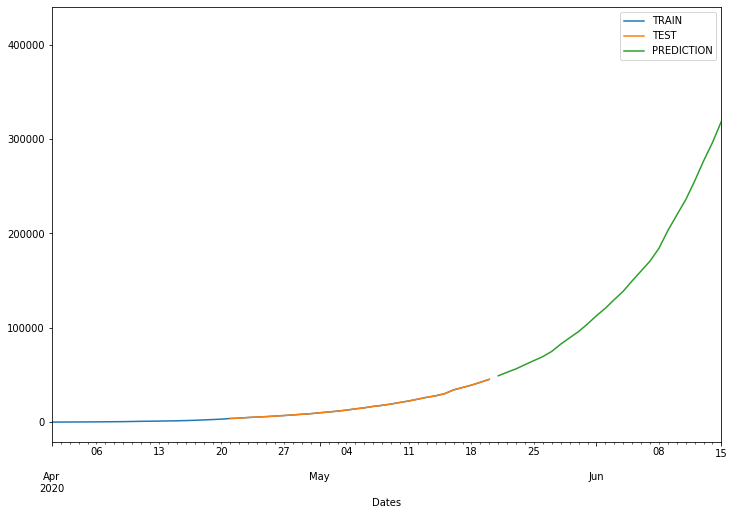

In [26]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-01','2020-06-15']) #Specify Date to see prediction

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
mean_absolute_error(test_data,test_predictions)

158357.26891165972

In [29]:
mean_squared_error(test_data,test_predictions)

34547183795.96121

In [30]:
np.sqrt(mean_squared_error(test_data,test_predictions))

185868.72732108866

In [31]:
test_data.describe()

,Total
count,30.000000
mean,18107.900000
std,12304.850592
min,3976.000000
25%,7911.500000
50%,14720.500000
75%,25926.250000
max,45422.000000


In [32]:
final_model = ExponentialSmoothing(df['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [33]:
forecast_predictions = final_model.forecast(30)

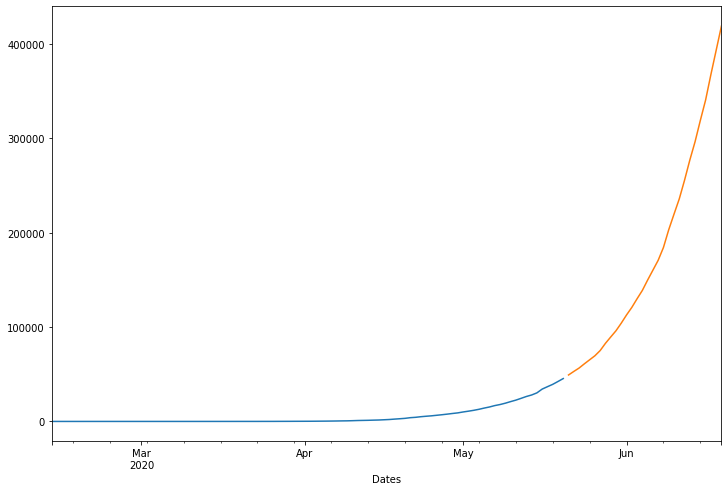

In [34]:
df['Total'].plot(figsize=(12,8))
forecast_predictions.plot()